In [1]:
import numpy as np
import pandas as pd
import scipy.stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#bene = pd.read_csv('./data/Train_Beneficiary.csv')
data = pd.read_csv('./data/Train_Inpatient.csv')
#outpat = pd.read_csv('./data/Train_Outpatient.csv')
target = pd.read_csv('./data/Train.csv')

#print(bene.shape)
print(data.shape)
#print(outpat.shape)
print(target.shape)

(40474, 30)
(5410, 2)


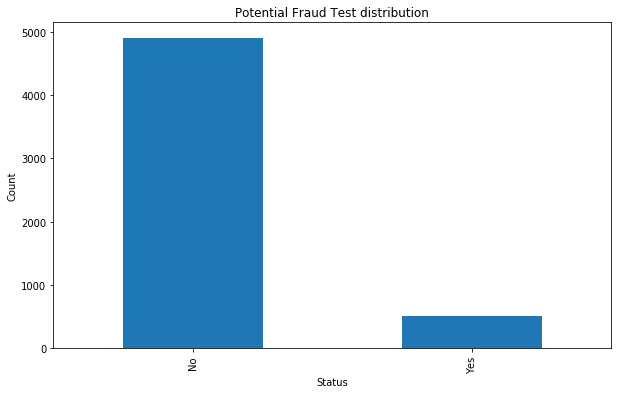

In [10]:
plt.title("Potential Fraud Test distribution")
target.groupby( ["PotentialFraud"] ).Provider.count().plot(kind = "bar", figsize = (10,6))
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

Change label to binary for fraud target

In [11]:
target["target"] = np.where(target.PotentialFraud == "Yes", 1, 0) 


In [12]:
data.sample(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
3930,BENE25054,CLM46345,2009-04-10,2009-04-11,PRV55462,0,PHY422134,NaN,NaN,2009-04-10,...,29590,2948,99529,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35301,BENE140760,CLM74430,2009-11-02,2009-11-06,PRV51108,7000,PHY311672,NaN,NaN,2009-11-02,...,49121,2724,2631,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17693,BENE75972,CLM32702,2009-01-06,2009-01-13,PRV52340,9000,PHY356016,PHY356016,NaN,2009-01-06,...,4111,4439,42822,NaN,4516.0,NaN,NaN,NaN,NaN,NaN


In [13]:
ClmProcedure_vars = ['ClmProcedureCode_{}'.format(x) for x in range(1,7)]

In [14]:
data['NumProc'] = data[ClmProcedure_vars].notnull().to_numpy().sum(axis = 1)

In [15]:
np.unique(data.NumProc.values)

array([0, 1, 2, 3, 4, 5])

In [16]:
data.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

In [17]:
ClmDiagnosisCode_vars =['ClmAdmitDiagnosisCode'] + ['ClmDiagnosisCode_{}'.format(x) for x in range(1, 11)]

### Create new variable 
data['NumClaims'] = data[ClmDiagnosisCode_vars].notnull().to_numpy().sum(axis = 1)


In [18]:
np.unique(data.NumClaims.values)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [22]:
from datetime import datetime

In [23]:
data['AdmissionDt'] = pd.to_datetime(data['AdmissionDt'] , format = '%Y-%m-%d')
data['DischargeDt'] = pd.to_datetime(data['DischargeDt'],format = '%Y-%m-%d')

data['ClaimStartDt'] = pd.to_datetime(data['ClaimStartDt'] , format = '%Y-%m-%d')
data['ClaimEndDt'] = pd.to_datetime(data['ClaimEndDt'],format = '%Y-%m-%d')

### Number of hospitalization days
data['AdmissionDays'] = ((data['DischargeDt'] - data['AdmissionDt']).dt.days) + 1
### Number of claim days 
data['ClaimDays'] = ((data['ClaimEndDt'] - data['ClaimStartDt']).dt.days) + 1


In [25]:
inpat.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


In [26]:
inpat.sample(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
25296,BENE103798,CLM44815,2009-03-30,2009-04-02,PRV54350,4000,PHY385561,NaN,NaN,2009-03-30,...,4280,78720,44023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37758,BENE149317,CLM62854,2009-08-06,2009-08-10,PRV52100,9000,PHY358829,NaN,NaN,2009-08-06,...,2724,7245,2809,E9800,NaN,NaN,NaN,NaN,NaN,NaN
3278,BENE22818,CLM34403,2009-01-18,2009-01-21,PRV55230,10000,PHY333406,PHY376123,NaN,2009-01-18,...,NaN,NaN,NaN,NaN,9907.0,NaN,NaN,NaN,NaN,NaN


In [24]:
mean_reim = data.groupby('Age')['InscClaimAmtReimbursed'].mean().reset_index()
median_reim = data.groupby('Age')['InscClaimAmtReimbursed'].median().reset_index()

KeyError: 'Age'

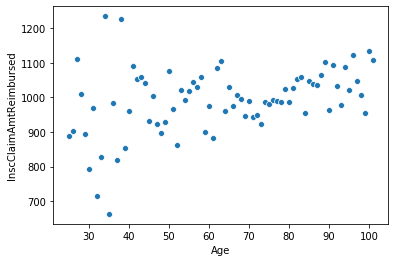

In [28]:
ax = sns.scatterplot(x='Age',y='InscClaimAmtReimbursed', data=mean_reim)
ax.figure.savefig("./plots/age_v_meanReim.svg",bbox_inches='tight')

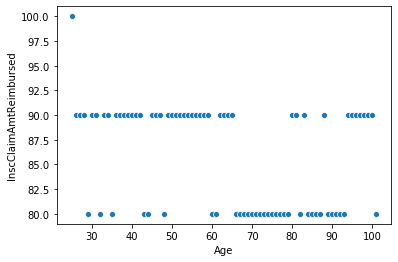

In [29]:
ax = sns.scatterplot(x='Age',y='InscClaimAmtReimbursed', data=median_reim)
ax.figure.savefig("./plots/age_v_medReim.svg",bbox_inches='tight')